In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 3.5MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=23ca7287c6a722ef8739b32cbda9cc8f4f31066e960dd516e3b0ea76ef117fd1
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.7MB/s 
     |████████████████████████████████| 983kB 2.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=c0758036456182e32a723705bd222717dac902189fc8a146aa403eba490b8097
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [10]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
[Errno 2] No such file or directory: '/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/'
/content
cat: '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json': No such file or directory


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [11]:
df_jp_wm = pd.read_json('pretty_jp_tweets_request.json')

df_gs_wm = pd.read_json('pretty_gs_tweets_request.json')

df_ms_wm = pd.read_json('pretty_ms_tweets_request.json')

df_ml_wm = pd.read_json('pretty_ml_tweets_request.json')



#sample = pd.read_csv('TwitterData.csv')



ValueError: ignored

In [ ]:
df_jp_wm = df_jp_wm.assign(company = "JPM")

In [ ]:
df_gs_wm = df_gs_wm.assign(company = "GS")

In [ ]:
df_ml_wm = df_ml_wm.assign(company = "ML")

In [ ]:
df_ms_wm = df_gs_wm.assign(company = "MS")

In [ ]:
df_all_wm = pd.concat([df_jp_wm,df_gs_wm,df_ml_wm,df_ms_wm])

In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment = df_all_wm['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
df_all_wm = pd.concat([df_all_wm, sentiment.apply(pd.Series)],1)

In [ ]:
df_all_wm.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound
0,False,[],[],False,False,0,[https://www.dallasnews.com/business/real-esta...,,0,[],0,Plano_Now,PLANO NOW\n\n...At Legacy West\n\n...JPMorgan ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-19 00:41:29,2018-12-19 00:41:29,1075189342358986752,/Plano_Now/status/1075189342358986753,267343862,Plano Now,,JPM,0.000,0.744,0.256,0.8519
1,False,[MirMAK],[],False,True,0,[],1073589411273682945,0,"[{'screen_name': 'MirMAKOfficial', 'user_id': ...",0,LiveSalman999,Humble Request #MirMAK it's been over 2 decade...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-15 15:37:36,2018-12-15 15:37:36,1073965303615361024,/LiveSalman999/status/1073965303615361024,2302240797,Salman Ahmed,,JPM,0.112,0.699,0.189,0.6069
2,False,[],[],False,False,0,[],,0,[],1,Pierreledesma11,Hey JP MORGAN CHASE BANK. \nWHERE IS THE JOSE ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-09 10:57:59,2018-12-09 10:57:59,1071720610391384064,/Pierreledesma11/status/1071720610391384064,941134916233912320,Pierreledesma14@gmail.com,,JPM,0.101,0.782,0.117,-0.0943
3,False,"[Waynesville, Oakwood, perjuryobstrutingjustice]",[],True,False,0,[https://twitter.com/ConsiderThis1/status/1071...,,1,[],1,Darla_Marlene,I have sent requests to both @WellsFargo and @...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-08 21:08:22,2018-12-08 21:08:22,1071511827836739584,/Darla_Marlene/status/1071511827836739584,826640074783744000,Darla m. Buckland,,JPM,0.124,0.836,0.040,-0.5707
4,True,"[MyPlusStudentsClub, MyPlus, Disability, JPMor...",[https://pbs.twimg.com/media/DtuMqNaX4AEA2qw.jpg],False,False,1,[],,0,[],2,MyPlusStudents,Sponsored by @jpmorgan \nDon't miss this week'...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-06 09:00:57,2018-12-06 09:00:57,1070603995201331200,/MyPlusStudents/status/1070603995201331200,1927593780,MyPlus Students,,JPM,0.000,0.858,0.142,0.4843
5,True,"[MyPlusStudentsClub, MyPlus, Disability, JPMor...",[https://pbs.twimg.com/media/DtkM3rRWoAA0QU6.jpg],False,False,0,[http://ow.ly/8V4430mR6Yc],,0,[],0,MyPlusStudents,Sponsored by @jpmorgan our guide explains wha...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-04 10:25:40,2018-12-04 10:25:40,1069900538869776384,/MyPlusStudents/status/1069900538869776384,1927593780,MyPlus Students,,JPM,0.000,0.903,0.097,0.4019
6,False,[],[],False,False,0,[https://www.dallasnews.com/business/real-esta...,,0,[],0,Plano_Now,PLANO NOW\n\n...At Legacy West\n\n...JPMorgan ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-19 00:41:29,2018-12-19 00:41:29,1075189342358986752,/Plano_Now/status/1075189342358986753,267343862,Plano Now,,JPM,0.000,0.744,0.256,0.8519
7,False,[MirMAK],[],False,True,0,[],1073589411273682945,0,"[{'screen_name': 'MirMAKOfficial', 'user_id': ...",0,LiveSalman999,Humble Request #MirMAK it's been over 2 decade...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-15 15:37:36,2018-12-15 15:37:36,1073965303615361024,/LiveSalman999/status/1073965303615361024,2302240797,Salman Ahmed,,JPM,0.112,0.699,0.189,0.6069
8,False,[],[],False,False,0,[],,0,[],1,Pierreledesma11,Hey JP MORGAN CHASE BANK. \nWHERE IS THE JOSE ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-09 10:57:59,2018-12-09 10:57:59,1071720610391384064,/Pierreledesma11/status/1071720610391384064,941134916233912320,Pierreledesma14@gmail.com,,JPM,0.101,0.782,0.117,-0.0943
9,False,"[Waynesville, Oakwood, perjuryobstrutingjustice]",[],True,False,0,[https://twitter.com/ConsiderThis1/status/1071...,,1,[],1,Darla_Marlene,I have sent requests to both @WellsFargo and @...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-08 21:08:22,2018-12-08 21:08:22,1071511827836739584,/Darla_Marlene/status/1071511827836739584,

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df_all_wm['date'] = df_all_wm['timestamp'].apply(lambda x: x.date())

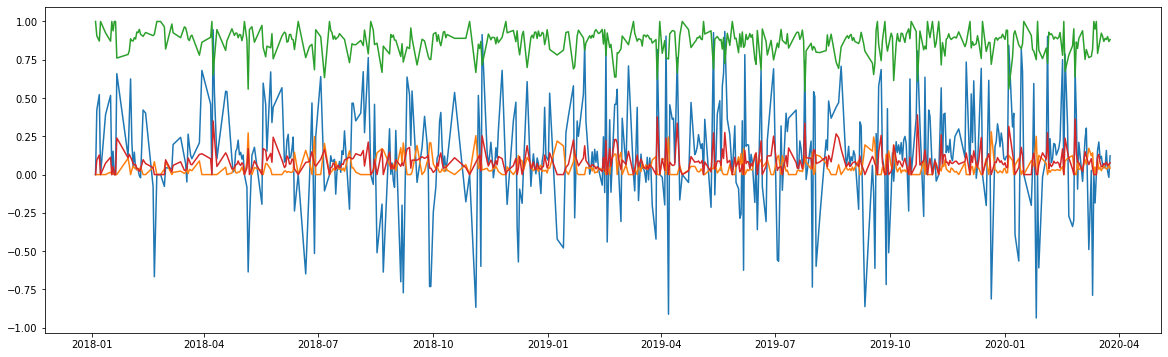

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df_all_wm.groupby('date').mean()['compound'].index, df_all_wm.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df_all_wm.groupby('date').mean()['neg'].index, df_all_wm.groupby('date').mean()['neg'].values)
plt.plot(df_all_wm.groupby('date').mean()['neu'].index, df_all_wm.groupby('date').mean()['neu'].values)
plt.plot(df_all_wm.groupby('date').mean()['pos'].index, df_all_wm.groupby('date').mean()['pos'].values)

In [ ]:
df_wm_sent_jp = df_all_wm[df_all_wm['company'] == 'JPM']
df_wm_sent_jp.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[https://www.dallasnews.com/business/real-esta...,,0,[],0,Plano_Now,PLANO NOW\n\n...At Legacy West\n\n...JPMorgan ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-19 00:41:29,2018-12-19 00:41:29,1075189342358986752,/Plano_Now/status/1075189342358986753,267343862,Plano Now,,JPM,0.000,0.744,0.256,0.8519,2018-12-19
1,False,[MirMAK],[],False,True,0,[],1073589411273682945,0,"[{'screen_name': 'MirMAKOfficial', 'user_id': ...",0,LiveSalman999,Humble Request #MirMAK it's been over 2 decade...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-15 15:37:36,2018-12-15 15:37:36,1073965303615361024,/LiveSalman999/status/1073965303615361024,2302240797,Salman Ahmed,,JPM,0.112,0.699,0.189,0.6069,2018-12-15
2,False,[],[],False,False,0,[],,0,[],1,Pierreledesma11,Hey JP MORGAN CHASE BANK. \nWHERE IS THE JOSE ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-09 10:57:59,2018-12-09 10:57:59,1071720610391384064,/Pierreledesma11/status/1071720610391384064,941134916233912320,Pierreledesma14@gmail.com,,JPM,0.101,0.782,0.117,-0.0943,2018-12-09
3,False,"[Waynesville, Oakwood, perjuryobstrutingjustice]",[],True,False,0,[https://twitter.com/ConsiderThis1/status/1071...,,1,[],1,Darla_Marlene,I have sent requests to both @WellsFargo and @...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-08 21:08:22,2018-12-08 21:08:22,1071511827836739584,/Darla_Marlene/status/1071511827836739584,826640074783744000,Darla m. Buckland,,JPM,0.124,0.836,0.040,-0.5707,2018-12-08
4,True,"[MyPlusStudentsClub, MyPlus, Disability, JPMor...",[https://pbs.twimg.com/media/DtuMqNaX4AEA2qw.jpg],False,False,1,[],,0,[],2,MyPlusStudents,Sponsored by @jpmorgan \nDon't miss this week'...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-06 09:00:57,2018-12-06 09:00:57,1070603995201331200,/MyPlusStudents/status/1070603995201331200,1927593780,MyPlus Students,,JPM,0.000,0.858,0.142,0.4843,2018-12-06
5,True,"[MyPlusStudentsClub, MyPlus, Disability, JPMor...",[https://pbs.twimg.com/media/DtkM3rRWoAA0QU6.jpg],False,False,0,[http://ow.ly/8V4430mR6Yc],,0,[],0,MyPlusStudents,Sponsored by @jpmorgan our guide explains wha...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-04 10:25:40,2018-12-04 10:25:40,1069900538869776384,/MyPlusStudents/status/1069900538869776384,1927593780,MyPlus Students,,JPM,0.000,0.903,0.097,0.4019,2018-12-04
6,False,[],[],False,False,0,[https://www.dallasnews.com/business/real-esta...,,0,[],0,Plano_Now,PLANO NOW\n\n...At Legacy West\n\n...JPMorgan ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-19 00:41:29,2018-12-19 00:41:29,1075189342358986752,/Plano_Now/status/1075189342358986753,267343862,Plano Now,,JPM,0.000,0.744,0.256,0.8519,2018-12-19
7,False,[MirMAK],[],False,True,0,[],1073589411273682945,0,"[{'screen_name': 'MirMAKOfficial', 'user_id': ...",0,LiveSalman999,Humble Request #MirMAK it's been over 2 decade...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-15 15:37:36,2018-12-15 15:37:36,1073965303615361024,/LiveSalman999/status/1073965303615361024,2302240797,Salman Ahmed,,JPM,0.112,0.699,0.189,0.6069,2018-12-15
8,False,[],[],False,False,0,[],,0,[],1,Pierreledesma11,Hey JP MORGAN CHASE BANK. \nWHERE IS THE JOSE ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-12-09 10:57:59,2018-12-09 10:57:59,1071720610391384064,/Pierreledesma11/status/1071720610391384064,941134916233912320,Pierreledesma14@gmail.com,,JPM,0.101,0.782,0.117,-0.0943,2018-12-09
9,False,"[Waynesville, Oakwood, perjuryobstrutingjustice]",[],True,False,0,[https://twitter.com/ConsiderThis1/status/1071...,,1,[],1,Darla_Marlene,I have sent requests to both @WellsFargo and @...,"<p class=""TweetTextSize js-tweet-text tweet-te...

In [ ]:
df_wm_sent_ms = df_all_wm[df_all_wm['company'] == 'MS']
df_wm_sent_ms.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[https://on.mktw.net/2H8wMwH],,0,[],0,atrustynote,Hy Ann Coulter look - talk about Billion reque...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 20:14:02,2018-04-30 20:14:02,991048049043693568,/atrustynote/status/991048049043693569,937129917497724928,dale trusty,,MS,0.000,0.903,0.097,0.4404,2018-04-30
1,False,[dogmauling2016],[],True,False,137,[],,7,[],10,AngryBlackLady,Finally filed my request for a default judgmen...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 17:47:56,2018-04-30 17:47:56,991011281900658688,/AngryBlackLady/status/991011281900658688,46822887,Imani Gandy ☄️🌏🔥,,MS,0.033,0.888,0.079,0.3197,2018-04-30
2,False,[],[],False,False,0,[http://www.booklending.com/~B07BVBJ5WK],,0,[],0,BLFeed,REQUEST: Princess From the Bronx by Kate Goldm...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-29 14:19:24,2018-04-29 14:19:24,990596416706883584,/BLFeed/status/990596416706883584,236073812,BookLending.com,,MS,0.000,1.000,0.000,0.0000,2018-04-29
3,True,"[hashgraph, blockchain, techpic]",[https://pbs.twimg.com/media/DbkC39OW0AAETrx.jpg],False,False,1,[],,0,[],0,michael_goldman,No license required for usage of @hashgraph bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-24 16:59:29,2018-04-24 16:59:29,988824763446505472,/michael_goldman/status/988824763446505473,44579340,Michael Goldman,,MS,0.192,0.808,0.000,-0.4215,2018-04-24
4,False,[],[],False,True,0,[],986335537568116737,0,"[{'screen_name': 'davidhogg111', 'user_id': '1...",0,B1GTEN01,What about Fidelity or Goldman Sachs? Where’s ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-18 13:40:48,2018-04-18 13:40:48,986600435577442304,/B1GTEN01/status/986600435577442304,885566995084824576,JFK,,MS,0.048,0.811,0.142,0.5445,2018-04-18
5,False,[],[],False,True,0,[https://www.facebook.com/Bucky-Goldman-And-As...,984075382256259078,0,"[{'screen_name': 'InternetHippo', 'user_id': '...",0,wangjexi,I don't think this request is legally enforcea...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-11 14:37:07,2018-04-11 14:37:07,984077891607638016,/wangjexi/status/984077891607638018,867193675209732096,Emperor Norton I 👑,,MS,0.000,0.947,0.053,0.1027,2018-04-11
6,False,[],[],False,False,0,[],,0,[],0,AllHits_86,Hey Joel Goldman thanks for following AllHits!...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-09 07:07:25,2018-04-09 07:07:25,983239945555980288,/AllHits_86/status/983239945555980288,1973000029,AllHits 86.6,,MS,0.000,0.759,0.241,0.5399,2018-04-09
7,False,[],[],False,False,1,"[https://lnkd.in/g4v-DAA, https://lnkd.in/gVEm...",,0,[],1,andywilsonsocal,If you are an active NorCal or SoCal VC or top...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-08 19:08:12,2018-04-08 19:08:12,983058947371253760,/andywilsonsocal/status/983058947371253766,139132607,andy wilson,,MS,0.000,0.650,0.350,0.9463,2018-04-08
8,False,[],[],False,False,0,[https://www.goldmanprize.org/request-permissi...,,0,[],0,bethanynbella,@goldmanprize Hi there - I'm trying to request...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-06 19:00:15,2018-04-06 19:00:15,982332170827001856,/bethanynbella/status/982332170827001857,1444685719,Bethany N. Bella,,MS,0.000,0.845,0.155,0.6900,2018-04-06
9,False,[],[],False,False,0,[https://on.mktw.net/2H8wMwH],,0,[],0,atrustynote,Hy Ann Coulter look - talk about Billion reque...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 20:14:02,2018-04-30 20:14:02,991048049043693568,/atrustynote/status/991048049043693569,937129917497724928,dale trusty,,MS,0.000,0.903,0.097,0.4404,2018-04-30


In [ ]:
df_wm_sent_ml = df_all_wm[df_all_wm['company'] == 'ML']
df_wm_sent_ml.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,True,2,[],1183880663566389248,0,"[{'screen_name': 'AjaSF', 'user_id': '46658899...",0,AjaSF,Taxpayer money was used to subsidize a string ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 23:48:48,2019-10-14 23:48:48,1183892442258558976,/AjaSF/status/1183892442258558977,46658899,Eincasso Picasstein 🇨🇱 🇺🇸 🏴,,ML,0.000,0.935,0.065,0.2500,2019-10-14
1,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,General Motors Co. (GM) surprised the market w...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 23:23:46,2019-10-14 23:23:46,1183886143433203712,/GoldmanSachBOT/status/1183886143433203719,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.866,0.134,0.5423,2019-10-14
2,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Public Service Enterprise Group (PEG) surprise...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:53:28,2019-10-14 22:53:28,1183878518054240256,/GoldmanSachBOT/status/1183878518054240257,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.871,0.129,0.5106,2019-10-14
3,True,[],[https://pbs.twimg.com/media/EG32WiPWwAA8Fos.png],False,False,0,[],,0,[],1,ezints,Selon le modèle de Bank of America Merrill Lyn...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:32:08,2019-10-14 22:32:08,1183873147826790400,/ezints/status/1183873147826790400,319264607,Ezints,,ML,0.000,1.000,0.000,0.0000,2019-10-14
4,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,"Axon Enterprise, Inc. (AAXN) surprised the mar...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 22:12:32,2019-10-14 22:12:32,1183868214150909952,/GoldmanSachBOT/status/1183868214150909952,1119063948689596416,EquityMarketPredictor,,ML,0.064,0.872,0.064,0.0000,2019-10-14
5,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Microsoft Corp. (MSFT) surprised the market wi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 21:42:35,2019-10-14 21:42:35,1183860677271797760,/GoldmanSachBOT/status/1183860677271797760,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.857,0.143,0.5423,2019-10-14
6,True,[],[https://pbs.twimg.com/media/EG3d2nwXYAAgLyb.png],True,False,29,[],,1,[],2,DanKawa2,"Segundo a Merrill Lynch, o percentual de IPOs ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 20:45:19,2019-10-14 20:45:19,1183846268336033792,/DanKawa2/status/1183846268336033792,2352090564,Dan Kawa,,ML,0.000,1.000,0.000,0.0000,2019-10-14
7,False,[],[],False,False,3,[https://www.bolsamania.com/noticias/mercados/...,,0,[],1,bolsamania,Merrill Lynch pone techo a Wall Street: 3.333 ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 20:40:00,2019-10-14 20:40:00,1183844928037834752,/bolsamania/status/1183844928037834752,61307129,Bolsamanía,,ML,0.000,1.000,0.000,0.0000,2019-10-14
8,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,"Axon Enterprise, Inc. (AAXN) surprised the mar...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 19:12:34,2019-10-14 19:12:34,1183822923703947264,/GoldmanSachBOT/status/1183822923703947271,1119063948689596416,EquityMarketPredictor,,ML,0.000,0.860,0.140,0.7184,2019-10-14
9,False,[],[],False,False,0,[],,0,[],0,fatchett_james,USA funds will be split between BOA/Merrill-Ly...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-10-14 19:02:52,2019-10-14 19:02:52,1183820483969466368,/fatchett_james/status/1183820483969466368,1104508481564889088,James Bradley Fatchett,,ML,0.000,1.000,0.000,0.0000,2019-10-14


In [ ]:
df_wm_sent_gs = df_all_wm[df_all_wm['company'] == 'GS']
df_wm_sent_gs.head(10)

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,company,neg,neu,pos,compound,date
0,False,[],[],False,False,0,[https://on.mktw.net/2H8wMwH],,0,[],0,atrustynote,Hy Ann Coulter look - talk about Billion reque...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 20:14:02,2018-04-30 20:14:02,991048049043693568,/atrustynote/status/991048049043693569,937129917497724928,dale trusty,,GS,0.000,0.903,0.097,0.4404,2018-04-30
1,False,[dogmauling2016],[],True,False,137,[],,7,[],10,AngryBlackLady,Finally filed my request for a default judgmen...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 17:47:56,2018-04-30 17:47:56,991011281900658688,/AngryBlackLady/status/991011281900658688,46822887,Imani Gandy ☄️🌏🔥,,GS,0.033,0.888,0.079,0.3197,2018-04-30
2,False,[],[],False,False,0,[http://www.booklending.com/~B07BVBJ5WK],,0,[],0,BLFeed,REQUEST: Princess From the Bronx by Kate Goldm...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-29 14:19:24,2018-04-29 14:19:24,990596416706883584,/BLFeed/status/990596416706883584,236073812,BookLending.com,,GS,0.000,1.000,0.000,0.0000,2018-04-29
3,True,"[hashgraph, blockchain, techpic]",[https://pbs.twimg.com/media/DbkC39OW0AAETrx.jpg],False,False,1,[],,0,[],0,michael_goldman,No license required for usage of @hashgraph bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-24 16:59:29,2018-04-24 16:59:29,988824763446505472,/michael_goldman/status/988824763446505473,44579340,Michael Goldman,,GS,0.192,0.808,0.000,-0.4215,2018-04-24
4,False,[],[],False,True,0,[],986335537568116737,0,"[{'screen_name': 'davidhogg111', 'user_id': '1...",0,B1GTEN01,What about Fidelity or Goldman Sachs? Where’s ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-18 13:40:48,2018-04-18 13:40:48,986600435577442304,/B1GTEN01/status/986600435577442304,885566995084824576,JFK,,GS,0.048,0.811,0.142,0.5445,2018-04-18
5,False,[],[],False,True,0,[https://www.facebook.com/Bucky-Goldman-And-As...,984075382256259078,0,"[{'screen_name': 'InternetHippo', 'user_id': '...",0,wangjexi,I don't think this request is legally enforcea...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-11 14:37:07,2018-04-11 14:37:07,984077891607638016,/wangjexi/status/984077891607638018,867193675209732096,Emperor Norton I 👑,,GS,0.000,0.947,0.053,0.1027,2018-04-11
6,False,[],[],False,False,0,[],,0,[],0,AllHits_86,Hey Joel Goldman thanks for following AllHits!...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-09 07:07:25,2018-04-09 07:07:25,983239945555980288,/AllHits_86/status/983239945555980288,1973000029,AllHits 86.6,,GS,0.000,0.759,0.241,0.5399,2018-04-09
7,False,[],[],False,False,1,"[https://lnkd.in/g4v-DAA, https://lnkd.in/gVEm...",,0,[],1,andywilsonsocal,If you are an active NorCal or SoCal VC or top...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-08 19:08:12,2018-04-08 19:08:12,983058947371253760,/andywilsonsocal/status/983058947371253766,139132607,andy wilson,,GS,0.000,0.650,0.350,0.9463,2018-04-08
8,False,[],[],False,False,0,[https://www.goldmanprize.org/request-permissi...,,0,[],0,bethanynbella,@goldmanprize Hi there - I'm trying to request...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-06 19:00:15,2018-04-06 19:00:15,982332170827001856,/bethanynbella/status/982332170827001857,1444685719,Bethany N. Bella,,GS,0.000,0.845,0.155,0.6900,2018-04-06
9,False,[],[],False,False,0,[https://on.mktw.net/2H8wMwH],,0,[],0,atrustynote,Hy Ann Coulter look - talk about Billion reque...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-04-30 20:14:02,2018-04-30 20:14:02,991048049043693568,/atrustynote/status/991048049043693569,937129917497724928,dale trusty,,GS,0.000,0.903,0.097,0.4404,2018-04-30


In [ ]:
df_wm_sent_gs.mean()['compound'], df_wm_sent_gs.mean()['neg'], df_wm_sent_gs.mean()['neu'], df_wm_sent_gs.mean()['pos']


(0.11317500000000005,
 0.05594262295081966,
 0.8569877049180327,
 0.08707786885245894)

In [ ]:

df_all_wm_com = df_all_wm.groupby('company')['compound'].mean()
df_all_wm_neu = df_all_wm.groupby('company')['neu'].mean()
df_all_wm_neg = df_all_wm.groupby('company')['neg'].mean()
df_all_wm_pos = df_all_wm.groupby('company')['pos'].mean()


# Grouped bar plot with seaborn
import seaborn as sns



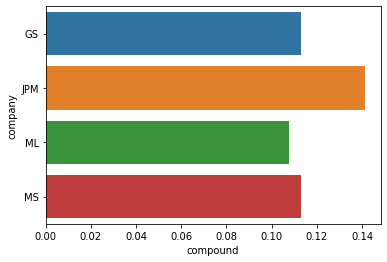

In [ ]:
df_all_wm_com = pd.DataFrame(df_all_wm_com)
df_all_wm_com = df_all_wm_com.reset_index()
sns.barplot(y='company',x='compound',data=df_all_wm_com)

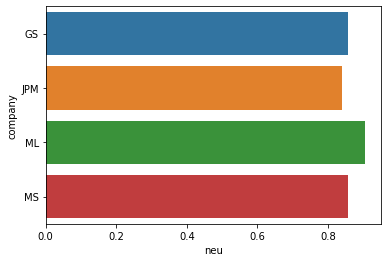

In [ ]:
df_all_wm_neu = pd.DataFrame(df_all_wm_neu)
df_all_wm_neu = df_all_wm_neu.reset_index()
sns.barplot(y='company',x='neu',data=df_all_wm_neu)

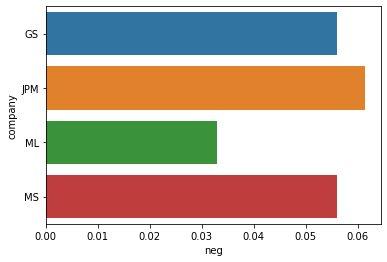

In [ ]:
df_all_wm_neg = pd.DataFrame(df_all_wm_neg)
df_all_wm_neg = df_all_wm_neg.reset_index()
sns.barplot(y='company',x='neg',data=df_all_wm_neg)

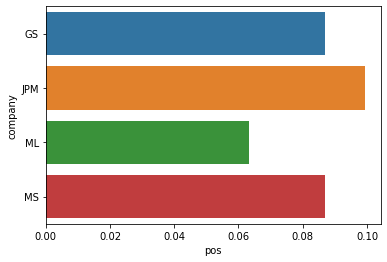

In [ ]:
df_all_wm_pos = pd.DataFrame(df_all_wm_pos)
df_all_wm_pos = df_all_wm_pos.reset_index()
sns.barplot(y='company',x='pos',data=df_all_wm_pos)